In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('Set3')
sns.set_style("darkgrid")
import numpy as np
from warnings import filterwarnings
filterwarnings(action="ignore")

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
data.head()

,Gender,Age,Hypertension,Heart_disease,Smoking_history,BMI,HbA1c_level,Blood_glucose_level,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.describe()

,Age,Hypertension,Heart_disease,BMI,HbA1c_level,Blood_glucose_level,Diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
data.isna().sum()

Gender                 0
Age                    0
Hypertension           0
Heart_disease          0
Smoking_history        0
BMI                    0
HbA1c_level            0
Blood_glucose_level    0
Diabetes               0
dtype: int64

In [6]:
data.columns

Index(['Gender', 'Age', 'Hypertension', 'Heart_disease', 'Smoking_history',
       'BMI', 'HbA1c_level', 'Blood_glucose_level', 'Diabetes'],
      dtype='object')

In [7]:
# Baseline predictive accuracy

(data["Diabetes"].value_counts()[0]/len(data))*100

91.5

##### The baselne predictive accuracy to beat is 91.5%

In [8]:
for column in data.columns:
    if data[column].nunique() < 7:
        print(f"{data[column].value_counts()/data.shape[0]}\n")

Gender
Female    0.58552
Male      0.41430
Other     0.00018
Name: count, dtype: float64

Hypertension
0    0.92515
1    0.07485
Name: count, dtype: float64

Heart_disease
0    0.96058
1    0.03942
Name: count, dtype: float64

Smoking_history
No Info        0.35816
never          0.35095
former         0.09352
current        0.09286
not current    0.06447
ever           0.04004
Name: count, dtype: float64

Diabetes
0    0.915
1    0.085
Name: count, dtype: float64



In [9]:
data["Gender"].value_counts()/100_000

Gender
Female    0.58552
Male      0.41430
Other     0.00018
Name: count, dtype: float64

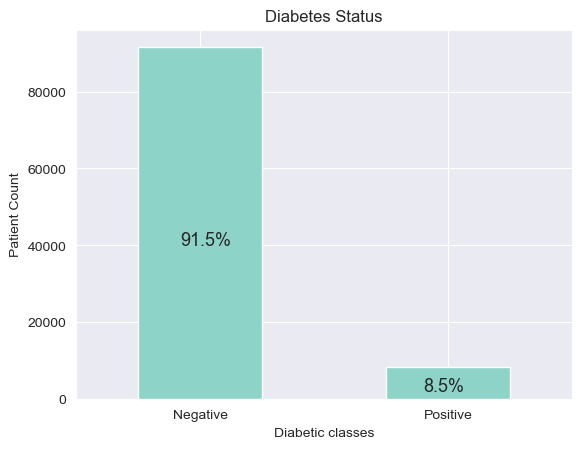

In [10]:
data["Diabetes"].value_counts().plot(kind="bar");
plt.ylabel("Patient Count")
plt.xlabel("Diabetic classes")
plt.annotate(text="91.5%", xy=(-0.08, 40000), fontsize = 13)
plt.annotate(text="8.5%", xy=(0.9, 2000), fontsize = 13)
plt.title("Diabetes Status")
plt.xticks([0, 1], ["Negative", "Positive"], rotation=0);
#plt.savefig("Fig_diabetes.png");

Text(0.5, 1.0, 'Gender Distribution of Patients')

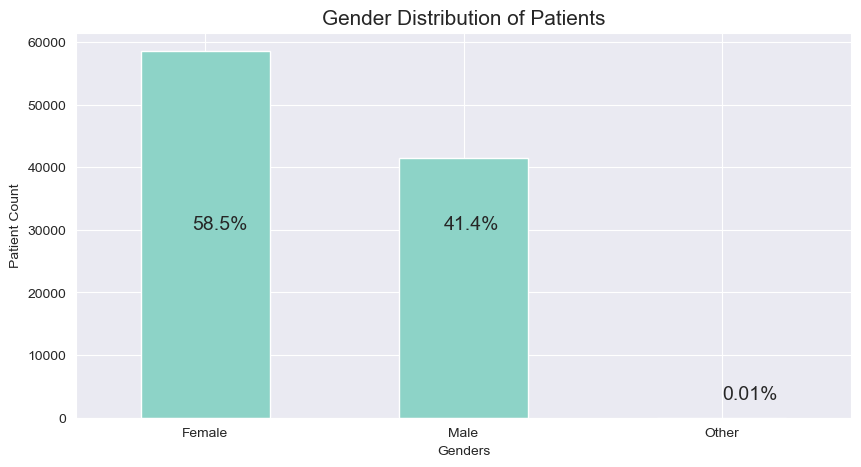

In [11]:
data["Gender"].value_counts().plot(kind="bar", figsize=(10, 5))
plt.ylabel("Patient Count")
plt.xlabel("Genders")
plt.annotate(text="58.5%", xy=(-0.05, 30000), fontsize = 14)
plt.annotate(text="41.4%", xy=(0.925, 30000), fontsize = 14)
plt.annotate(text="0.01%", xy=(2, 3000), fontsize = 14)
plt.xticks(rotation=0)
plt.title("Gender Distribution of Patients", fontsize=15)
#plt.savefig("Fig_1.png");

([<matplotlib.axis.XTick at 0x15bcea3d950>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

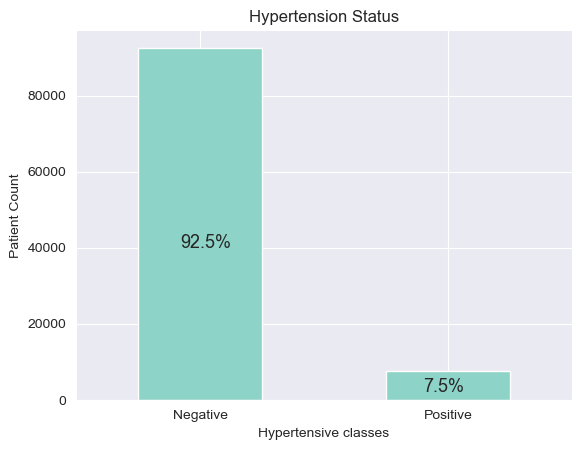

In [12]:
data["Hypertension"].value_counts().plot(kind="bar");
plt.ylabel("Patient Count")
plt.xlabel("Hypertensive classes")
plt.annotate(text="92.5%", xy=(-0.08, 40000), fontsize = 13)
plt.annotate(text="7.5%", xy=(0.9, 2000), fontsize = 13)
plt.title("Hypertension Status")
plt.xticks([0, 1], ["Negative", "Positive"], rotation=0)
#plt.savefig("Fig_2.png");

Text(0.5, 1.0, 'Age distribution of patients')

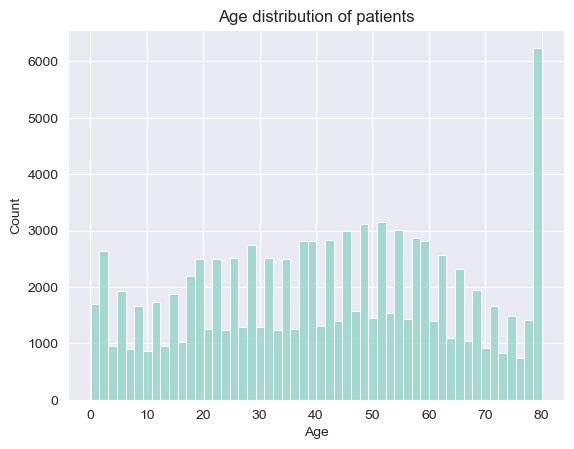

In [13]:
sns.histplot(data["Age"])
plt.title("Age distribution of patients")
#plt.savefig("Fig_3.png");

In [14]:
data["Smoking_history"] = data["Smoking_history"].replace("ever", "never")

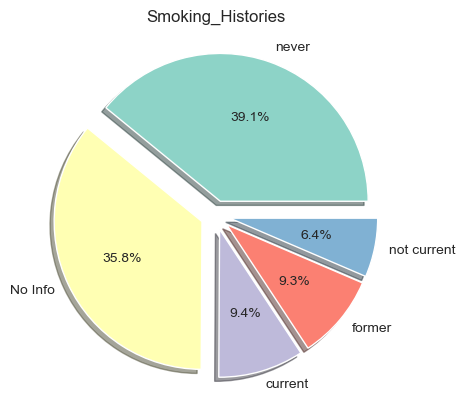

In [15]:
plt.pie(
    x=data["Smoking_history"].value_counts(),
    labels=data["Smoking_history"].unique(), 
    shadow=True,
    autopct = "%1.1f%%", 
    explode=[0.1, 0.1, 0.1, 0.1, 0.1],)
plt.title("Smoking_Histories")
plt.savefig("Fig_30.png")

In [16]:
data["Smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'not current'],
      dtype=object)

Text(0.5, 1.0, 'Distribution of HbA1c_levels')

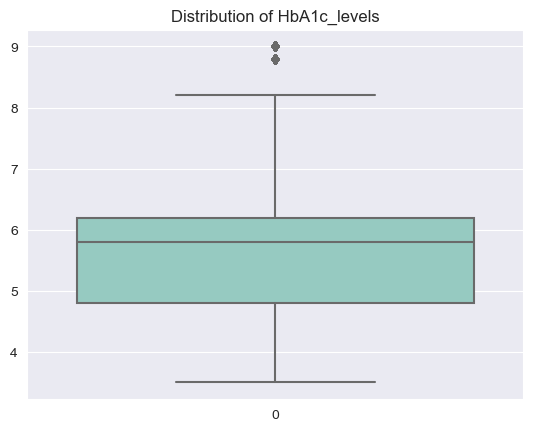

In [17]:
sns.boxplot(data["HbA1c_level"])
plt.title("Distribution of HbA1c_levels")
#plt.savefig("Fig_5.png");

Text(0.5, 1.0, 'Distribution of BMI measurements')

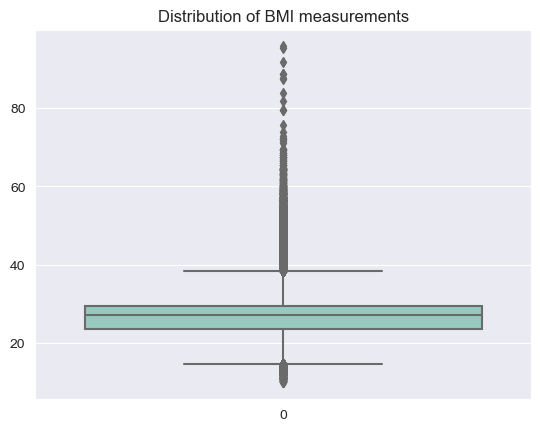

In [18]:
sns.boxplot(data["BMI"])
plt.title("Distribution of BMI measurements")
#plt.savefig("Fig_6.png");

Text(0.5, 1.0, 'Distribution of Blood Glucose measurements')

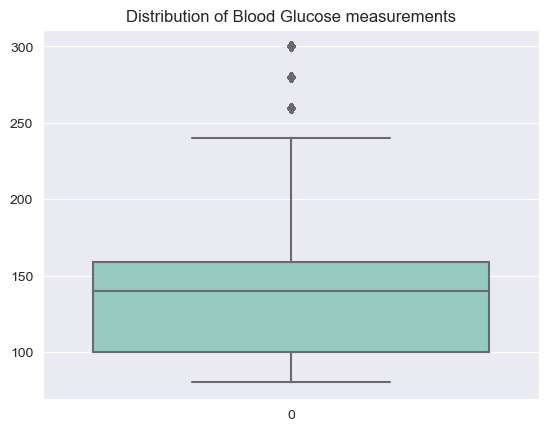

In [19]:
sns.boxplot(data["Blood_glucose_level"])
plt.title("Distribution of Blood Glucose measurements")
#plt.savefig("Fig_7.png");

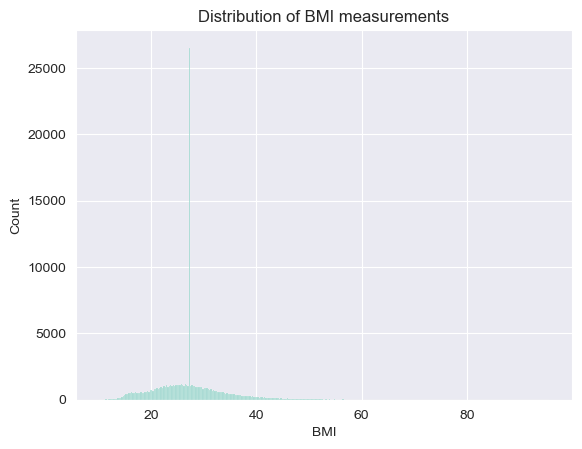

In [20]:
sns.histplot(data["BMI"])
plt.title("Distribution of BMI measurements");
#plt.savefig("Fig_6.png");

In [21]:
num_cats = [i for i in data.columns if data[i].dtypes != "O"]

In [22]:
corr_matrix  = data[num_cats].corr()
corr_matrix["Diabetes"].sort_values(ascending=False)

Diabetes               1.000000
Blood_glucose_level    0.419558
HbA1c_level            0.400660
Age                    0.258008
BMI                    0.214357
Hypertension           0.197823
Heart_disease          0.171727
Name: Diabetes, dtype: float64

Text(0.5, 1.0, 'Variable Correlations')

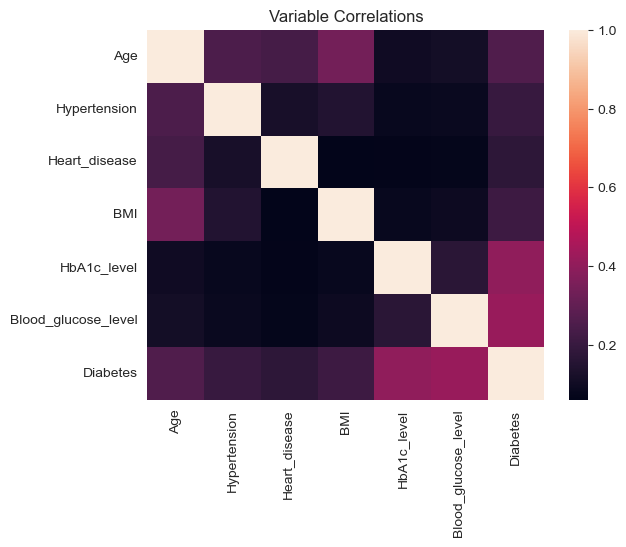

In [23]:
sns.heatmap(corr_matrix)
plt.title("Variable Correlations")
#plt.savefig("Fig_8.png")

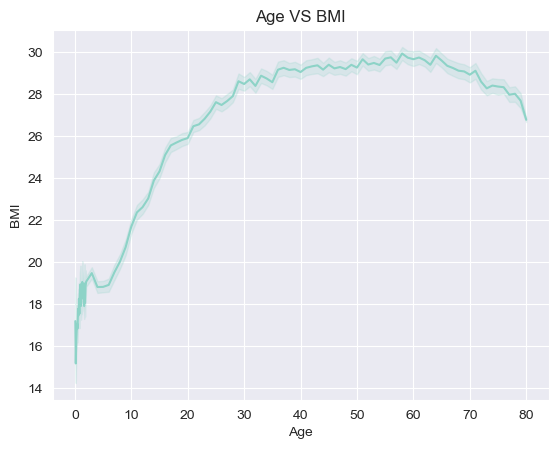

In [24]:
sns.lineplot(data, x="Age", y="BMI")
plt.title("Age VS BMI");
#plt.savefig("Fig_9.png"